Lets test and see if we if we can just add these files together

In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.12/06


In [2]:
f = r.TFile("./gm2offline_ana_7893458_15937.00027.root")
f.cd("clusterTree")
f.ls()

TFile**		./gm2offline_ana_7893458_15937.00027.root	
 TFile*		./gm2offline_ana_7893458_15937.00027.root	
  TDirectoryFile*		clusterTree	clusterTree (ClusterTree) folder
   KEY: TTree	clusters;94	clusters
   KEY: TTree	clusters;93	clusters
  KEY: TDirectoryFile	CoincidenceFinderLM;1	CoincidenceFinderLM (CoincidenceFinderLM) folder
  KEY: TDirectoryFile	clusterTree;1	clusterTree (ClusterTree) folder


In [3]:
t1 = f.Get("clusterTree").Get("clusters")

In [4]:
f2 = r.TFile("./data/gm2offline_ana_run16355.root")
f2.cd("clusterTree")
f2.ls()

TFile**		./data/gm2offline_ana_run16355.root	
 TFile*		./data/gm2offline_ana_run16355.root	
  TDirectoryFile*		clusterTree	clusterTree (ClusterTree) folder
   KEY: TTree	clusters;2	clusters
   KEY: TTree	clusters;1	clusters
  KEY: TDirectoryFile	CoincidenceFinderLM;1	CoincidenceFinderLM (CoincidenceFinderLM) folder
  KEY: TDirectoryFile	clusterTree;1	clusterTree (ClusterTree) folder


In [5]:
t2 = f2.Get("clusterTree").Get("clusters")

In [6]:
treelist = r.TList()
treelist.Add(t1)
treelist.Add(t2)

In [7]:
treelist.ls()

OBJ: TList	TList	Doubly linked list : 0
 OBJ: TTree	clusters	clusters : 0 at: 0x7fffec264170
 OBJ: TTree	clusters	clusters : 0 at: 0x7fffe8d10a10


In [8]:
#t = r.TTree.MergeTrees(treelist)

In [9]:
#t.ls()

In [10]:
chain = r.TChain("clusterTree/clusters")

In [11]:
chain.Add("./data/gm2offline_ana_run16355.root")
chain.Add("./gm2offline_ana_7893458_15937.00027.root")

1

In [12]:
chain.ls()

OBJ: TChain	clusterTree/clusters	 : 0 at: 0x7fffec3340e0
 ./data/gm2offline_ana_run16355.roottree:clusterTree/clusters entries=<not calculated>
 ./gm2offline_ana_7893458_15937.00027.roottree:clusterTree/clusters entries=<not calculated>


In [13]:
chain.Merge("data/gm2offline_ana_merged.root")

1

In [24]:
fchain = r.TFile("data/gm2offline_ana_merged.root")
fchain.ls()
fchain.cd()

True

TFile**		data/gm2offline_ana_merged.root	chain files
 TFile*		data/gm2offline_ana_merged.root	chain files
  KEY: TTree	clusters;1	clusters


In [25]:
def GetKeyNames( self, dir = "" ):
        self.cd(dir)
        return [key.GetName() for key in r.gDirectory.GetListOfKeys()]
r.TFile.GetKeyNames = GetKeyNames

keyList = fchain.GetKeyNames("")
print ("\nKeys in file:", keyList)


Keys in file: ['clusters']


In [26]:
ding = r.TTree()
fchain.GetObject(keyList[0], ding)

In [27]:
ding.Print()

******************************************************************************
*Tree    :clusters  : clusters                                               *
*Entries : 101741458 : Total =      6918577711 bytes  File  Size = 2847103962 *
*        :          : Tree compression factor =   2.43                       *
******************************************************************************
*Br    0 :energy    : energy/D                                               *
*Entries :101741458 : Total  Size=  813950120 bytes  File Size  =  774777480 *
*Baskets :      187 : Basket Size=    5676215 bytes  Compression=   1.05     *
*............................................................................*
*Br    1 :time      : time/D                                                 *
*Entries :101741458 : Total  Size=  813949738 bytes  File Size  =  776764309 *
*Baskets :      187 : Basket Size=    5676215 bytes  Compression=   1.05     *
*..................................................

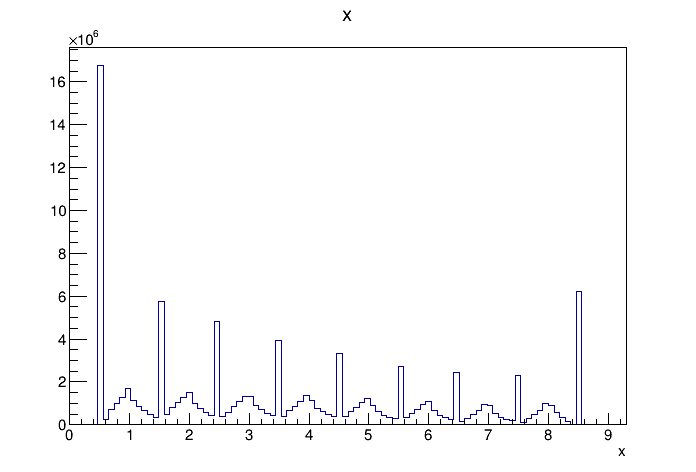

In [31]:
c = r.TCanvas()
ding.Draw("x")
c.Draw()